In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [66]:
df_game_mes = pd.read_csv('game_mes.csv', sep=',', error_bad_lines=False)

In [67]:
df_game_mes.head()

,device_id,event_date,creation_date,app,iap_purchases,iap_revenue,ads_revenue,ad_impressions,revenue_total,platform_amazon,...,country_Netherlands,country_Philippines,country_Poland,country_Russian Federation,country_Spain,country_Thailand,country_Turkey,country_United Kingdom,country_United States,country_outros
0,484c0f6c716b62fbdd651b48448632c6,2022-01,2020-12,Football Simulator,1,4.181645,0.002683,6,4.184328,0,...,0,0,0,0,0,0,0,0,0,0
1,54a09dd2892b768a6ae566e0f4ee61e1,2022-05,2022-05,Football Simulator,1,2.359500,0.065268,3,2.424768,0,...,0,0,0,0,0,0,0,0,0,1
2,be59fd534f61e87e6c617fa50edde27e,2022-04,2022-03,Football Simulator,1,2.223075,0.032855,28,2.255930,0,...,0,0,0,0,0,0,0,0,1,0
3,af4830573c2ac1d4efc538d16d645b31,2022-03,2022-03,Football Simulator,1,3.933454,0.000260,7,3.933713,0,...,0,0,0,0,0,0,0,0,0,0
4,13c70063c611c94b1f5051e4eba6f5c0,2022-03,2022-03,Football Simulator,1,3.238375,0.000663,4,3.239038,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
df_dt_login = df_game_mes.groupby('creation_date').sum().reset_index()

In [69]:
df_dt_cadastros = df_game_mes.groupby('creation_date').device_id.nunique().reset_index()
df_games_final = pd.merge(df_dt_login ,df_dt_cadastros , how="left", on=["creation_date"])

In [70]:
df_games_final.head()

,creation_date,iap_purchases,iap_revenue,ads_revenue,ad_impressions,revenue_total,platform_amazon,platform_android,platform_ios,partner_Organic,...,country_Philippines,country_Poland,country_Russian Federation,country_Spain,country_Thailand,country_Turkey,country_United Kingdom,country_United States,country_outros,device_id
0,2017-10,11,26.855482,0.147423,169,27.002905,0,2,9,0,...,0,0,0,0,2,0,0,0,9,2
1,2017-11,32,97.435611,0.687522,524,98.123133,0,32,0,0,...,0,0,0,2,0,9,0,0,17,8
2,2017-12,399,1187.211535,7.782600,3917,1194.994135,0,369,29,0,...,3,2,3,14,1,0,43,70,75,121
3,2018-01,223,659.536054,4.380163,1877,663.916218,0,189,29,0,...,0,0,0,12,1,5,6,29,63,73
4,2018-02,365,1025.874332,5.982095,4512,1031.856426,0,338,23,0,...,1,25,0,6,0,0,6,43,59,80


In [71]:
df_games_final['creation_date'] = pd.to_datetime(df_games_final['creation_date'],format="%Y-%m")

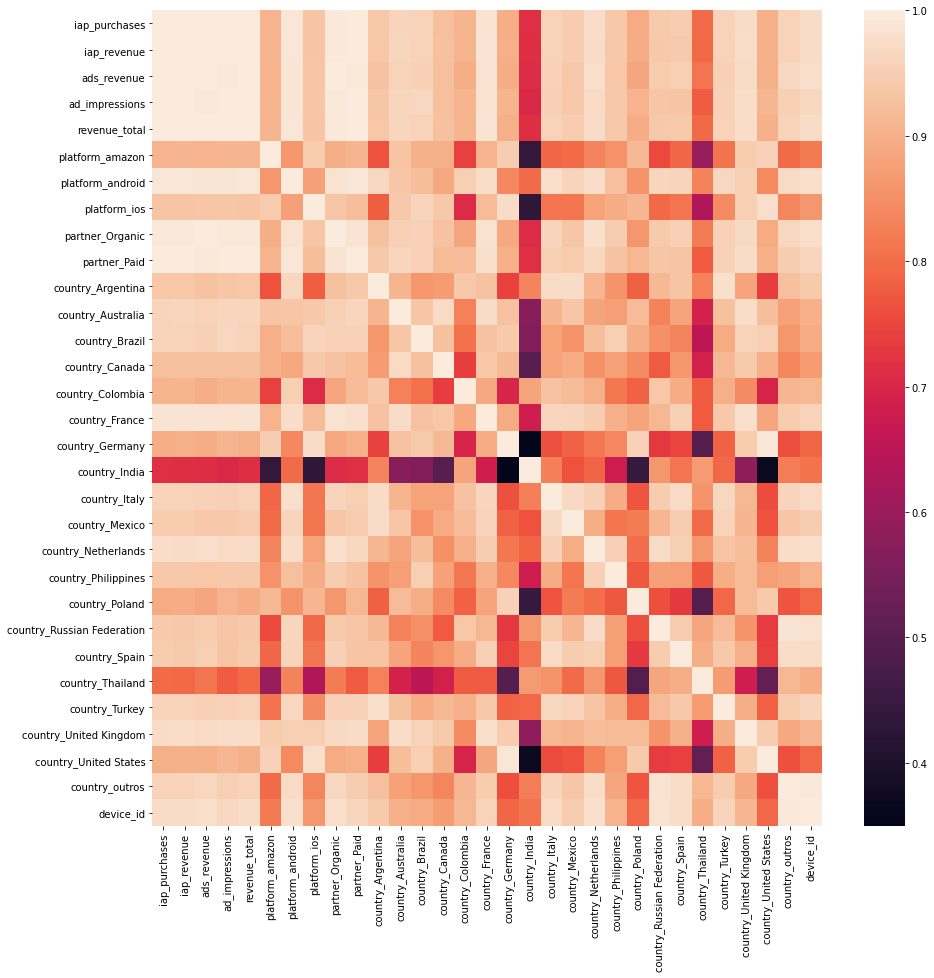

In [72]:
corr = df_games_final.corr()
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

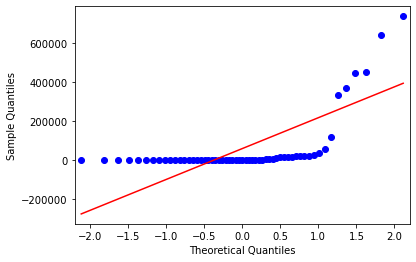

In [73]:
data= df_games_final['device_id']
qqplot(data, line='s')
plt.show()

In [74]:
from scipy.stats import shapiro

In [75]:
def shapiro_test(data, alpha=0.05):
    stat, p = shapiro(data)
    print('p-valor: p=%.3f' % (p))
    # interpret
    alpha = alpha
    if p > alpha:
        print('A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0')
    else:
        print('A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0')
    return stat, p

In [76]:
stat_normal, p_normal = shapiro_test(data)

p-valor: p=0.000
A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0


In [100]:
df_teste = df_games_final.drop(columns=['creation_date'])

In [101]:
df_teste = df_teste.drop(columns=['iap_purchases' , 'iap_revenue' , 'ads_revenue' , 'revenue_total'])

In [102]:
x = df_teste.drop(columns=['device_id'])
y = df_teste['device_id']

In [103]:
x = sm.add_constant(x)

In [104]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ad_impressions              57 non-null     int64
 1   platform_amazon             57 non-null     int64
 2   platform_android            57 non-null     int64
 3   platform_ios                57 non-null     int64
 4   partner_Organic             57 non-null     int64
 5   partner_Paid                57 non-null     int64
 6   country_Argentina           57 non-null     int64
 7   country_Australia           57 non-null     int64
 8   country_Brazil              57 non-null     int64
 9   country_Canada              57 non-null     int64
 10  country_Colombia            57 non-null     int64
 11  country_France              57 non-null     int64
 12  country_Germany             57 non-null     int64
 13  country_India               57 non-null     int64
 14  country_Ital

In [105]:
model_linear_multiple = sm.OLS(y,x.astype(float))
model_linear_multiple = model_linear_multiple.fit()


#sm.OLS(y, X.astype(float)).fit()

In [106]:
print(model_linear_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:              device_id   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.673e+05
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           8.42e-85
Time:                        01:10:44   Log-Likelihood:                -389.33
No. Observations:                  57   AIC:                             828.7
Df Residuals:                      32   BIC:                             879.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               